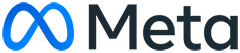

# **Getting to know Llama 3.1: Everything you need to start building**
Our goal in this session is to provide a guided tour of Llama 3.1 with comparison with Llama 2, including understanding different Llama 3.1 models, how and where to access them, Generative AI and Chatbot architectures, prompt engineering, RAG (Retrieval Augmented Generation), Fine-tuning and more. All this is implemented with a starter code for you to take it and use it in your Llama 3.1 projects.

### **0 - Prerequisites**
* Basic understanding of Large Language Models
* Basic understanding of Python

In [1]:
%pip install matplotlib ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [2]:
# presentation layer code

import base64
from IPython.display import Image, display
import matplotlib.pyplot as plt

def mm(graph):
  graphbytes = graph.encode("ascii")
  base64_bytes = base64.b64encode(graphbytes)
  base64_string = base64_bytes.decode("ascii")
  display(Image(url="https://mermaid.ink/img/" + base64_string))

def genai_app_arch():
  mm("""
  flowchart TD
    A[Users] --> B(Applications e.g. mobile, web)
    B --> |Hosted API|C(Platforms e.g. Custom, HuggingFace, Replicate)
    B -- optional --> E(Frameworks e.g. LangChain)
    C-->|User Input|D[Llama 3]
    D-->|Model Output|C
    E --> C
    classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

def rag_arch():
  mm("""
  flowchart TD
    A[User Prompts] --> B(Frameworks e.g. LangChain)
    B <--> |Database, Docs, XLS|C[fa:fa-database External Data]
    B -->|API|D[Llama 3]
    classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

def llama2_family():
  mm("""
  graph LR;
      llama-2 --> llama-2-7b
      llama-2 --> llama-2-13b
      llama-2 --> llama-2-70b
      llama-2-7b --> llama-2-7b-chat
      llama-2-13b --> llama-2-13b-chat
      llama-2-70b --> llama-2-70b-chat
      classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

def llama3_family():
  mm("""
  graph LR;
      llama-3 --> llama-3-8b
      llama-3 --> llama-3-70b
      llama-3-8b --> llama-3-8b
      llama-3-8b --> llama-3-8b-instruct
      llama-3-70b --> llama-3-70b
      llama-3-70b --> llama-3-70b-instruct
      classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)
  
def llama3_1_family():
  mm("""
  graph LR;
      llama-3-1 --> llama-3-8b
      llama-3-1 --> llama-3-70b
      llama-3-1 --> llama-3-4050b
      llama-3-1-8b --> llama-3-1-8b
      llama-3-1-8b --> llama-3-1-8b-instruct
      llama-3-1-70b --> llama-3-1-70b
      llama-3-1-70b --> llama-3-1-70b-instruct
      llama-3-1-405b --> llama-3-1-405b-instruct
      classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

import ipywidgets as widgets
from IPython.display import display, Markdown

# Create a text widget
API_KEY = widgets.Password(
    value='',
    placeholder='',
    description='API_KEY:',
    disabled=False
)

def md(t):
  display(Markdown(t))

def bot_arch():
  mm("""
  graph LR;
  user --> prompt
  prompt --> i_safety
  i_safety --> context
  context --> Llama_3
  Llama_3 --> output
  output --> o_safety
  i_safety --> memory
  o_safety --> memory
  memory --> context
  o_safety --> user
  classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

def fine_tuned_arch():
  mm("""
  graph LR;
      Custom_Dataset --> Pre-trained_Llama
      Pre-trained_Llama --> Fine-tuned_Llama
      Fine-tuned_Llama --> RLHF
      RLHF --> |Loss:Cross-Entropy|Fine-tuned_Llama
      classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

def load_data_faiss_arch():
  mm("""
  graph LR;
      documents --> textsplitter
      textsplitter --> embeddings
      embeddings --> vectorstore
      classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

def mem_context():
  mm("""
      graph LR
      context(text)
      user_prompt --> context
      instruction --> context
      examples --> context
      memory --> context
      context --> tokenizer
      tokenizer --> embeddings
      embeddings --> LLM
      classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)


### **1 - Understanding Llama 3.1**

### **1.1 - What is Llama 3.1?**

* State of the art (SOTA), Open Source LLM
* 8B, 70B, 405B - base and instruct models
* Choosing model: Size, Quality, Cost, Speed
* Pretrained + Chat
* [Meta Llama 3.1 Blog](https://ai.meta.com/blog/meta-llama-3-1/)
* [Getting Started with Meta Llama](https://llama.meta.com/docs/get-started)

In [ ]:
llama2_family()

In [ ]:
llama3_family()

In [ ]:
llama3_1_family()

### **1.2 - Accessing Llama 3.1**
* Download + Self Host (i.e. [download Llama](https://ai.meta.com/resources/models-and-libraries/llama-downloads))
* Hosted API Platform (e.g. [Groq](https://console.groq.com/), [Replicate](https://replicate.com/meta/meta-llama-3-8b-instruct), [Together](https://api.together.xyz/playground/language/meta-llama/Llama-3-8b-hf), [Anyscale](https://app.endpoints.anyscale.com/playground))

* Hosted Container Platform (e.g. [Azure](https://techcommunity.microsoft.com/t5/ai-machine-learning-blog/introducing-llama-2-on-azure/ba-p/3881233), [AWS](https://aws.amazon.com/blogs/machine-learning/llama-2-foundation-models-from-meta-are-now-available-in-amazon-sagemaker-jumpstart/), [GCP](https://console.cloud.google.com/vertex-ai/publishers/google/model-garden/139))



### **1.3 - Use Cases of Llama 3.1**
* Content Generation
* Summarization
* General Chatbots
* RAG (Retrieval Augmented Generation): Chat about Your Own Data
* Fine-tuning
* Agents

## **2 - Using and Comparing Llama 3 and Llama 2**

We will be using Llama 2 7b & 70b chat and Llama 3 8b & 70b instruct models hosted on [Replicate](https://replicate.com/search?query=llama) to run the examples here. You will need to first sign in with Replicate with your github account, then create a free API token [here](https://replicate.com/account/api-tokens) that you can use for a while. You can also use other Llama 3 cloud providers such as [Groq](https://console.groq.com/), [Together](https://api.together.xyz/playground/language/meta-llama/Llama-3-8b-hf), or [Anyscale](https://app.endpoints.anyscale.com/playground).


### **2.1 - Install dependencies**

In [ ]:
%pip install replicate

### **2.2 - Create helpers for Llama 2 and Llama 3**
First, set your Replicate API token as environment variables.


In [3]:
import os
from getpass import getpass

#REPLICATE_API_TOKEN = getpass()
REPLICATE_API_TOKEN = 'r8_Kk7bbhH3QAcCqwLxVAWi4GBGU6kVKTG4DwuDw'

os.environ["REPLICATE_API_TOKEN"] = REPLICATE_API_TOKEN

Create Llama 2 and Llama 3 helper functions - for chatbot type of apps, we'll use Llama 3 instruct and Llama 2 chat models, not the base models.

In [4]:
import replicate

def llama2_7b(prompt):
    output = replicate.run(
      "meta/llama-2-7b-chat",
      input={"prompt": prompt}
    )
    return ''.join(output)

def llama2_70b(prompt):
    output = replicate.run(
      "meta/llama-2-70b-chat",
      input={"prompt": prompt}
    )
    return ''.join(output)

def llama3_8b(prompt):
    output = replicate.run(
      "meta/meta-llama-3-8b-instruct",
      input={"prompt": prompt}
    )
    return ''.join(output)

def llama3_70b(prompt):
    output = replicate.run(
      "meta/meta-llama-3-70b-instruct",
      input={"prompt": prompt}
    )
    return ''.join(output)

### **2.3 - Basic QA with Llama 2 and 3**

In [5]:
prompt = "The typical color of a llama is: "
output = llama2_7b(prompt)
md(output)

 Hello! I'm here to help you with your question. The typical color of a llama is actually a beautiful shade of white or cream. Llamas are known for their distinctive coats, which are usually white or cream-colored with a long, thick coat that helps protect them from the elements in their native Andean highlands. However, some llamas may have patches of brown or gray on their faces, legs, or underbelly. So while the typical color of a llama is white or cream, there can be some variation in their coat patterns. Is there anything else I can help you with?

In [6]:
output = llama3_8b(prompt)
md(output)



The typical color of a llama is white! However, llamas can also come in a variety of other colors, including brown, gray, black, and even spotted or multi-colored. But white is the most common and well-known color for llamas.

In [7]:
output = llama2_7b("The typical color of a llama is what? Answer in one word.")
md(output)

 Sure, I'd be happy to help! The typical color of a llama is brown.

In [8]:
output = llama3_8b("The typical color of a llama is what? Answer in one word.")
md(output)



Brown.

**Note: Llama 3 follows instructions better than Llama 2 in single-turn chat.**

## **3 - Chat conversation**

### **3.1 - Single-turn chat**

In [9]:
prompt_chat = "What is the average lifespan of a Llama? Answer the question in few words."
output = llama2_7b(prompt_chat)
md(output)

 The average lifespan of a llama is approximately 15-20 years.

In [10]:
output = llama3_8b(prompt_chat)
md(output)



15-20 years.

In [11]:
# example without previous context. LLM's are stateless and cannot understand "they" without previous context
prompt_chat = "What animal family are they? Answer the question in few words."
output = llama2_7b(prompt_chat)
md(output)

 Great, I'd be happy to help! The animal family that the question is referring to is... (pausing for a moment to ensure accuracy) ...the Canidae family!

In [12]:
output = llama3_8b(prompt_chat)
md(output)



Canine.

In [13]:
output = llama2_70b(prompt_chat)
md(output)

 The animals you are referring to are part of the family Canidae.

In [14]:
output = llama3_70b(prompt_chat)
md(output)



I'm happy to help! However, I need more context. Who are "they" referring to? Could you please provide more information or clarify the question?

**Note: Llama 3 70b doesn't hallucinate.**

### **3.2 - Multi-turn chat**
Chat app requires us to send in previous context to LLM to get in valid responses. Below is an example of Multi-turn chat.

In [15]:
# example of multi-turn chat, with storing previous context
prompt_chat = """
User: What is the average lifespan of a Llama?
Assistant: 15-20 years.
User: What animal family are they?
"""
output = llama2_7b(prompt_chat)
md(output)

 Great! I'm here to help you with your questions.

To answer your first question, the average lifespan of a Llama is around 15-20 years. This information is based on the average lifespan of domesticated Llamas, which are the most common type of Llama kept as pets or used for their wool, milk, or as pack animals. However, it's important to note that the lifespan of Llamas can vary depending on various factors such as their breed, living conditions, and health status.

Regarding your second question, Llamas are part of the camelid family, which includes other animals such as camels, alpacas, and vicuñas. The camelid family is characterized by their distinctive long necks, legs, and ears, as well as their ability to survive in hot and dry environments. Llamas are known for their gentle nature, intelligence, and unique ability to spit when they feel threatened or scared.

In [16]:
output = llama3_8b(prompt_chat)
md(output)



Llamas belong to the camelid family, which also includes camels, alpacas, and guanacos.

**Note: Llama 2 and 3 both behave well for using the chat history for follow up questions.**

### **3.3 - Multi-turn chat with more instruction**
Adding the instructon "Answer the question with one word" to see the difference of Llama 2 and 3.

In [17]:
# example of multi-turn chat, with storing previous context
prompt_chat = """
User: What is the average lifespan of a Llama?
Assistant: Sure! The average lifespan of a llama is around 20-30 years.
User: What animal family are they?

Answer the question with one word.
"""
output = llama2_7b(prompt_chat)
md(output)

 Sure! Llamas are members of the Camelidae family.

In [18]:
output = llama2_70b(prompt_chat)
md(output)

 Camelids

In [19]:
output = llama3_8b(prompt_chat)
md(output)



Camelidae.

**Both Llama 3 8b and Llama 2 70b follows instructions (e.g. "Answer the question with one word") better than Llama 2 7b in multi-turn chat.**

### **4.2 - Prompt Engineering**
* Prompt engineering refers to the science of designing effective prompts to get desired responses

* Helps reduce hallucination


#### **4.2.1 - In-Context Learning (e.g. Zero-shot, Few-shot)**
 * In-context learning - specific method of prompt engineering where demonstration of task are provided as part of prompt.
  1. Zero-shot learning - model is performing tasks without any
input examples.
  2. Few or “N-Shot” Learning - model is performing and behaving based on input examples in user's prompt.

In [20]:
# Zero-shot example. To get positive/negative/neutral sentiment, we need to give examples in the prompt
prompt = '''
Classify: I saw a Gecko.
Sentiment: ?

Give one word response.
'''
output = llama2_7b(prompt)
md(output)

 Positive

In [21]:
output = llama3_8b(prompt)
md(output)



Neutral

**Note: Llama 3 has different opinions than Llama 2.**

In [22]:
# By giving examples to Llama, it understands the expected output format.

prompt = '''
Classify: I love Llamas!
Sentiment: Positive
Classify: I dont like Snakes.
Sentiment: Negative
Classify: I saw a Gecko.
Sentiment:

Give one word response.
'''

output = llama2_7b(prompt)
md(output)

 Of course, I'm here to help! Here are the classifications and sentiments for the three statements you provided:

Classify: I love Llamas!
Sentiment: Positive

Classify: I don't like Snakes.
Sentiment: Negative

Classify: I saw a Gecko.
Sentiment: Neutral

In [23]:
output = llama3_8b(prompt)
md(output)



Neutral

**Note: Llama 2, with few shots, has the same output "Neutral" as Llama 3, but Llama 2 doesn't follow instructions (Give one word response) well.**

#### **4.2.2 - Chain of Thought**
"Chain of thought" enables complex reasoning through logical step by step thinking and generates meaningful and contextually relevant responses.

In [24]:
# Standard prompting
prompt = '''
Llama started with 5 tennis balls. It buys 2 more cans of tennis balls. Each can has 3 tennis balls.
How many tennis balls does Llama have?

Answer in one word.
'''

output = llama3_8b(prompt)
md(output)



Eight

In [25]:
output = llama3_70b(prompt)
md(output)



Eleven.

**Note: Llama 3-8b did not get the right answer because it was asked to answer in one word.**

In [26]:
# By default, Llama 3 models follow "Chain-Of-Thought" prompting
prompt = '''
Llama started with 5 tennis balls. It buys 2 more cans of tennis balls. Each can has 3 tennis balls.
How many tennis balls does Llama have?
'''

output = llama3_8b(prompt)
md(output)



Let's break it down step by step!

Llama started with 5 tennis balls.

It buys 2 more cans of tennis balls, and each can has 3 tennis balls. So, the total number of tennis balls bought is:

2 cans x 3 tennis balls/can = 6 tennis balls

Now, Llama has the original 5 tennis balls, plus the 6 new tennis balls, making a total of:

5 (initial tennis balls) + 6 (new tennis balls) = 11 tennis balls

So, Llama now has 11 tennis balls!

In [27]:
output = llama3_70b(prompt)
md(output)



Let's break it down step by step!

Llama starts with 5 tennis balls.

It buys 2 more cans of tennis balls, and each can has 3 tennis balls. So, Llama gets 2 x 3 = 6 new tennis balls.

To find the total number of tennis balls Llama has, we add the new tennis balls to the ones it already had: 5 (initial tennis balls) + 6 (new tennis balls) = 11

Therefore, Llama now has 11 tennis balls!

**Note: By default, Llama 3 models identify word problems and solves it step by step!**

In [28]:
prompt = """
15 of us want to go to a restaurant.
Two of them have cars
Each car can seat 5 people.
Two of us have motorcycles.
Each motorcycle can fit 2 people.
Can we all get to the restaurant by car or motorcycle?
Think step by step.
Provide the answer as a single yes/no answer first.
Then explain each intermediate step.
"""
output = llama3_8b(prompt)
print(output)



Yes.

Here's the step-by-step breakdown:

1. We have 15 people who want to go to the restaurant.
2. Two people have cars, and each car can seat 5 people. This means we can fit a total of 2 x 5 = 10 people in cars.
3. Since we have 15 people, and 10 people can fit in cars, we still have 5 people left who don't have a seat in a car.
4. Two people have motorcycles, and each motorcycle can fit 2 people. This means we can fit a total of 2 x 2 = 4 people on motorcycles.
5. Since we have 5 people left who don't have a seat in a car, and we can fit 4 people on motorcycles, we can still accommodate the remaining 1 person on a motorcycle.
6. Therefore, we can accommodate all 15 people by using the cars and motorcycles.


In [29]:
output = llama3_70b(prompt)
print(output)



**Answer:** YES

Here's the step-by-step explanation:

1. We have 15 people who want to go to the restaurant.
2. We have 2 cars, each of which can seat 5 people. So, the total capacity of the cars is 2 x 5 = 10 people.
3. This means we can fit 10 people in the cars, leaving 15 - 10 = 5 people remaining.
4. We have 2 motorcycles, each of which can fit 2 people. So, the total capacity of the motorcycles is 2 x 2 = 4 people.
5. Since we have 5 people remaining, we can fit 4 of them on the motorcycles, leaving 5 - 4 = 1 person remaining.
6. Unfortunately, we don't have any more vehicles to fit the last remaining person. However, we can fit 1 person in a car, as each car has a spare seat (5 seats - 5 people already seated = 1 spare seat).
7. Therefore, we can fit the last remaining person in one of the cars, which already has 5 people.

In conclusion, we can fit all 15 people in the 2 cars and 2 motorcycles, so the answer is YES!


**Note: Llama 3 70b model works correctly in this example.**

**Summary: Llama 2 often needs encouragement for step by step thinking to correctly reasoning. Llama 3 understands, reasons and explains better, making chain of thought unnecessary in the cases above.**

### **4.3 - Retrieval Augmented Generation (RAG)**
* Prompt Eng Limitations - Knowledge cutoff & lack of specialized data

* Retrieval Augmented Generation(RAG) allows us to retrieve snippets of information from external data sources and augment it to the user's prompt to get tailored responses from Llama 2.

For our demo, we are going to download an external PDF file from a URL and query against the content in the pdf file to get contextually relevant information back with the help of Llama!





In [30]:
rag_arch()

#### **4.3.1 - LangChain**
LangChain is a framework that helps make it easier to implement RAG.

In [31]:
%pip install langchain
%pip install langchain-community
%pip install sentence-transformers
%pip install faiss-cpu
%pip install bs4
%pip install langchain-groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 4.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.2 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.
  Using cached dataclasses_json-0.6.7-py3-none-any.whl.metadata (25 kB)
  Using cached mypy_extensions-1.0.0-py3-none-any.whl.metadata (1.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 13.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 25.2 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


#### **4.3.2 - LangChain Q&A Retriever**
* ConversationalRetrievalChain

* Query the Source documents


In [32]:
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_community.vectorstores import FAISS
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
import bs4

# Step 1: Load the document from a web url
loader = WebBaseLoader(["https://huggingface.co/blog/llama31"])
documents = loader.load()

# Step 2: Split the document into chunks with a specified chunk size
text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=50)
all_splits = text_splitter.split_documents(documents)

# Step 3: Store the document into a vector store with a specific embedding model
vectorstore = FAISS.from_documents(all_splits, HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2"))

USER_AGENT environment variable not set, consider setting it to identify your requests.
/var/folders/bf/jhq9xfmd3pl5gx2syv_nn_zc0000gp/T/ipykernel_83228/3677386397.py:16: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  vectorstore = FAISS.from_documents(all_splits, HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2"))
/Users/danc/anaconda3/envs/llm/lib/python3.12/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

You'll need to first sign in at [Groq](https://console.groq.com/login) with your github or gmail account, then get an API token to try Groq out for free.

In [33]:
import os
from getpass import getpass

#GROQ_API_TOKEN = getpass()
GROQ_API_TOKEN = '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'

os.environ["GROQ_API_KEY"] = GROQ_API_TOKEN

In [34]:
from langchain_groq import ChatGroq
llm = ChatGroq(temperature=0, model_name="llama3-8b-8192")

In [35]:
from langchain.chains import ConversationalRetrievalChain

# Query against your own data
chain = ConversationalRetrievalChain.from_llm(llm,
                                              vectorstore.as_retriever(),
                                              return_source_documents=True)

# no chat history passed
result = chain({"question": "What’s new with Llama 3?", "chat_history": []})
md(result['answer'])


/var/folders/bf/jhq9xfmd3pl5gx2syv_nn_zc0000gp/T/ipykernel_83228/3414030532.py:9: LangChainDeprecationWarning: The method `Chain.__call__` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  result = chain({"question": "What’s new with Llama 3?", "chat_history": []})


According to the text, Llama 3.1 is the new iteration of the Llama family, and it comes with the following changes:

* Eight open-weight models (3 base models and 5 fine-tuned ones) are available on the Hub.
* The licensing terms have changed, allowing the use of model outputs to improve other LLMs, including synthetic data generation and distillation.
* There is no specific mention of what has changed in the model itself, beyond the evaluation results, which are still being evaluated.

In [36]:
# This time your previous question and answer will be included as a chat history which will enable the ability
# to ask follow up questions.
query = "What two sizes?"
chat_history = [(query, result["answer"])]
result = chain({"question": query, "chat_history": chat_history})
md(result['answer'])

According to the context, Llama 3.1 comes in three sizes:

1. 8B
2. 70B
3. 405B

## **5 - Fine-Tuning Models**

* Limitatons of Prompt Eng and RAG
* Fine-Tuning Arch
* Types (PEFT, LoRA, QLoRA)
* Using PyTorch for Pre-Training & Fine-Tuning

* Evals + Quality

Examples of Fine-Tuning:
* [Meta Llama Recipes](https://github.com/meta-llama/llama-recipes/tree/main/recipes/finetuning)
* [Hugging Face fine-tuning with Llama 3](https://huggingface.co/blog/llama3#fine-tuning-with-%F0%9F%A4%97-trl)


## **6 - Responsible AI**

* Power + Responsibility
* Hallucinations
* Input & Output Safety
* Red-teaming (simulating real-world cyber attackers)
* [Responsible Use Guide](https://ai.meta.com/llama/responsible-use-guide/)



## **7 - Conclusion**
* Active research on LLMs and Llama
* Leverage the power of Llama and its open community
* Safety and responsible use is paramount!

* Call-To-Action
  * [Replicate Free Credits](https://replicate.fyi/connect2023) for Connect attendees!
  * This notebook is available through Llama Github recipes
  * Use Llama in your projects and give us feedback


#### **Resources**
- [Meta Llama 3.1 Blog](https://ai.meta.com/blog/meta-llama-3-1/)
- [Getting Started with Meta Llama](https://llama.meta.com/docs/get-started)
- [Llama 3 repo](https://github.com/meta-llama/llama3)
- [Llama 3 model card](https://github.com/meta-llama/llama3/blob/main/MODEL_CARD.md)
- [LLama 3 Recipes repo](https://github.com/meta-llama/llama-recipes)
- [Responsible Use Guide](https://ai.meta.com/llama/responsible-use-guide/)
- [Acceptable Use Policy](https://ai.meta.com/llama/use-policy/)

